
# Classification Basics

We will now explore some basic algorithms used in classification tasks, focusing on logistic regression, which is a foundational algorithm in this area.

## Logistic Regression

Despite its name, logistic regression is a classification algorithm. It models the probability that the target variable $y$ belongs to a particular class. The [logistic function (sigmoid)](https://en.wikipedia.org/wiki/Logistic_function) is used to map predicted values to probabilities between 0 and 1. The decision boundary is determined by the threshold (commonly 0.5) for classifying observations into different classes.

The sigmoid function is defined as: $$\sigma(z) = \frac{1}{1 + e^{-z}}$$ where $z$ is a linear combination of the input features. In a one-dimensional case, it can be visualized as follows:

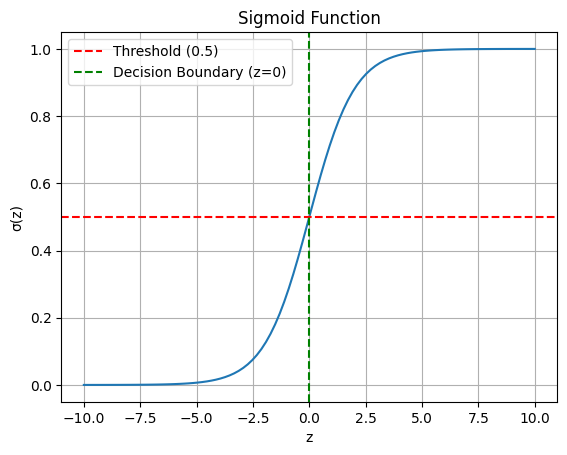

In [1]:
import numpy as np
import matplotlib.pyplot as plt
z = np.linspace(-10, 10, 100)
sigmoid = 1 / (1 + np.exp(-z))
plt.plot(z, sigmoid)
plt.title("Sigmoid Function")
plt.xlabel("z")
plt.ylabel("σ(z)")
plt.grid()
plt.axhline(0.5, color='red', linestyle='--', label='Threshold (0.5)')
plt.axvline(0, color='green', linestyle='--', label='Decision Boundary (z=0)')
plt.legend()
plt.show()

### Mathematical Formulation

The logistic regression model can be expressed as: $$P(y=1|X) = \frac{1}{1 + e^{-(\beta_0 + \beta_1 X_1 + \ldots + \beta_n X_n)}}$$ where

-   $P(y = 1|X)$: probability of the positive class given the features $X$
-   $\beta_0, \beta_1, \ldots, \beta_n$: the model coefficients

The logistic regression model is trained by maximizing the likelihood of the observed data, which is equivalent to minimizing the negative log-likelihood (cross-entropy loss).

## Practical Demonstration

To illustrate logistic regression, we will use a very simple synthetic dataset, consisting of one feature and a binary target variable. This will allow us to visualize the decision boundary clearly.

-   Generating a synthetic dataset

In [2]:
from sklearn.datasets import make_classification
import pandas as pd

# Generate a synthetic dataset with one feature and binary target
X, y = make_classification(n_samples=1000, n_features=1, n_informative=1, n_redundant=0,
                           n_clusters_per_class=1, random_state=0)
df = pd.DataFrame(X, columns=['feature'])
df['target'] = y
df['target'] = df['target'].astype('category')
df['target'] = df['target'].cat.codes

X = df.drop(columns=['target'])
y = df['target']

-   Visualizing the dataset

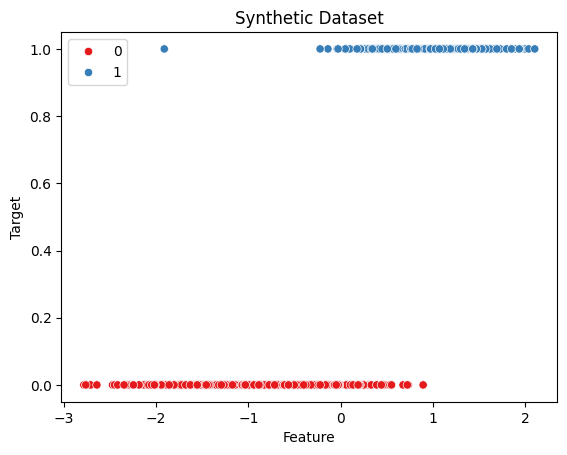

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.scatterplot(data=df, x='feature', y='target', hue='target', palette='Set1')
plt.title("Synthetic Dataset")
plt.xlabel("Feature")
plt.ylabel("Target")
# plt.axhline(0.5, color='red', linestyle='--', label='Decision Boundary (0.5)')
plt.legend()
plt.show()

-   Training a logistic regression model

In [4]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = \
    train_test_split(df[['feature']], df['target'], test_size=0.2, random_state=42)

# Train a logistic regression model
clf = LogisticRegression()
clf.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


-   Evaluating the model's accuracy

In [5]:
from sklearn.metrics import classification_report, confusion_matrix
# Make predictions on the test set
y_pred = clf.predict(X_test)
from sklearn.metrics import accuracy_score
# Evaluate the model's accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Model accuracy:", accuracy)

print("Classification Report:\n", classification_report(y_test, y_pred))

Model accuracy: 0.97
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.94      0.97       101
           1       0.94      1.00      0.97        99

    accuracy                           0.97       200
   macro avg       0.97      0.97      0.97       200
weighted avg       0.97      0.97      0.97       200



-   Visualizing the decision boundary

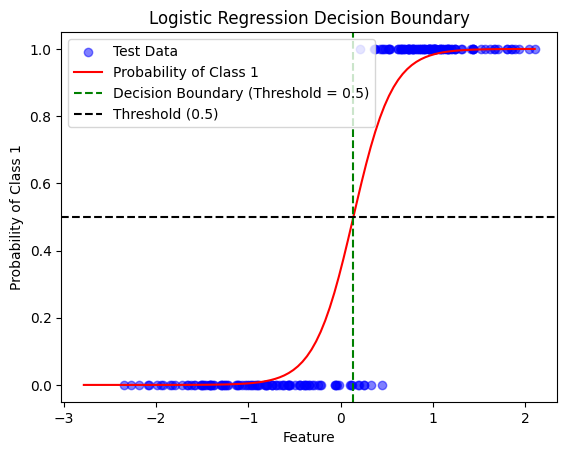

In [6]:
x_range = np.linspace(X['feature'].min(), X['feature'].max(), 100).reshape(-1, 1)
X_range = pd.DataFrame(x_range, columns=X.columns)
y_prob = clf.predict_proba(X_range)[:, 1]

plt.scatter(X_test['feature'], y_test, c='blue', label='Test Data', alpha=0.5)
plt.plot(X_range, y_prob, color='red', label='Probability of Class 1')
plt.axvline(X_range[y_prob < 0.5]['feature'].max(),
            color='green', linestyle='--',
            label='Decision Boundary (Threshold = 0.5)')
plt.axhline(0.5, color='black', linestyle='--', label='Threshold (0.5)')
plt.title("Logistic Regression Decision Boundary")
plt.xlabel("Feature")
plt.ylabel("Probability of Class 1")
plt.legend()
plt.show()

## Hands-on Exercises

Modify the synthetic dataset to include two features instead of one. Train a logistic regression model and visualize the decision boundary in a 2D plot.

-   Generate the 2D synthetic dataset.

In [7]:
# Generate a synthetic dataset with two features and binary target
X, y = make_classification(n_samples=1000, n_features=2, n_informative=2, n_redundant=0,
                           n_clusters_per_class=1, random_state=0)
df = pd.DataFrame(X, columns=['feature1', 'feature2'])
df['target'] = y
df['target'] = df['target']

X = df.drop(columns=['target'])
y = df['target']

print("Feature columns:", X.columns.tolist())
print("Feature data types:", X.dtypes)

Feature columns: ['feature1', 'feature2']
Feature data types: feature1    float64
feature2    float64
dtype: object


In [14]:
df['feature2'] = df['feature1']**2

-   Visualize the dataset.

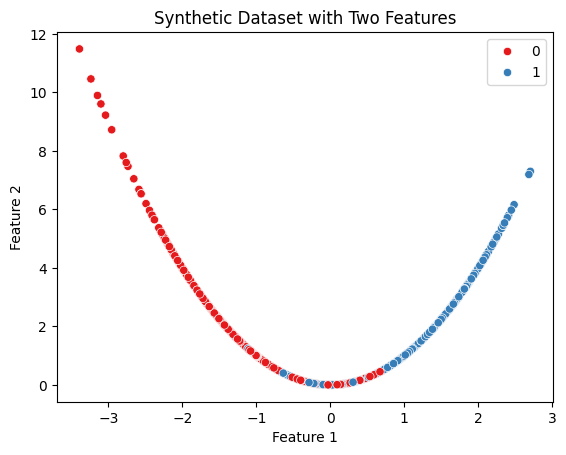

In [15]:
sns.scatterplot(data=df, x='feature1', y='feature2', hue='target', palette='Set1')
plt.title("Synthetic Dataset with Two Features")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()

-   Split the dataset into training and test sets.

In [20]:
X_train, X_test, y_train, y_test = \
    train_test_split(df[['feature1', 'feature2']], y, test_size=0.2, random_state=42)

-   Train a logistic regression model.

In [21]:
clf = LogisticRegression()
clf.fit(X_train, y_train)
print("Model coefficients:", clf.coef_)
print("Model intercept:", clf.intercept_)

Model coefficients: [[ 3.2850785 -0.3622739]]
Model intercept: [-0.10254618]


-   Evaluate the model's accuracy.

In [22]:
y_pred = clf.predict(X_test)
# Evaluate the model's accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Model accuracy:", accuracy)

Model accuracy: 0.92


-   Visualize the decision boundary.

/home/camarocico/venvs/ml_workshop/lib/python3.13/site-packages/sklearn/inspection/_plot/decision_boundary.py:221: UserWarning: The following kwargs were not used by contour: 'label'
  self.surface_ = plot_func(self.xx0, self.xx1, self.response, **kwargs)


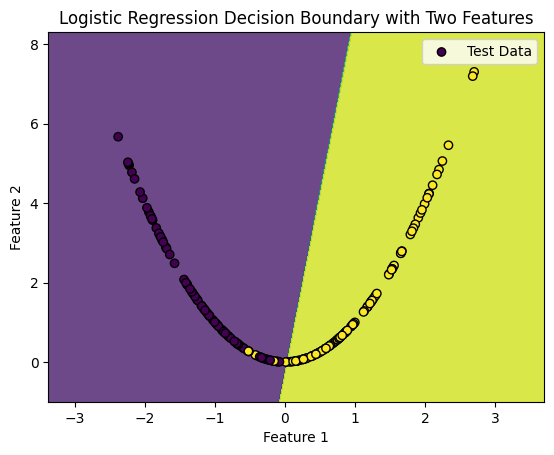

In [23]:
# Plot decision boundaries
from sklearn.inspection import DecisionBoundaryDisplay
display = DecisionBoundaryDisplay.from_estimator(
    estimator=clf,
    X=X_test,
    alpha=0.8,
    grid_resolution=500,
    response_method="predict",
    label='Decision Boundary'
)
display.ax_.scatter(
    X_test['feature1'],
    X_test['feature2'],
    c=y_test.astype('category').cat.codes, edgecolor="black",
    label='Test Data'
)
plt.title("Logistic Regression Decision Boundary with Two Features")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()